In [2]:
# #import librarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import utm
import folium
import branca

GPSData = pd.read_csv('Escritorio/nuevo/inclinacion1.csv', # GPS DATA
                      header=0)
REFMAP = pd.read_csv('Escritorio/nuevo/ref123.csv', #REFERENCE MAP
                      header=0)
# VARIABLES GPS DATA
latGPS = GPSData['lat']  # latitud Datos GPS
lonGPS = GPSData['lon']  # longitud Datos GPS
UTMX = [] # coordenadas X
UTMY = [] # coordenadas Y
# VARIABLES REFERENCE MAP DATA
latRM = REFMAP['lat']
lonRM = REFMAP['lon']
REFX = []
REFY = []
m=[] #pendiente
#valores de los puntos extremos del secmento
X_1=[]
Y_1=[]
X_2=[]
Y_2=[]
#distancias a cada uno de los segmentos
D=[]
d1=[]
d2=[]
d3=[]
d4=[]
d5=[]
d6=[]
d7=[]
d8=[]
d9=[]
d10=[]
d11=[]
d12=[]
d13=[]
d14=[]
d15=[]
d16=[]
d17=[]
d18=[]

#mapa de referencia 
data = pd.DataFrame(GPSData[:43], columns = ['lat','lon'])
data.head()

def colores(row):
    return 'blue'
    

data['color'] = data.apply(colores, axis=1)
data.head()



mapred_GPS = folium.Map(location=[0.339035,-78.140066], zoom_start=100)

data.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lon"]],
                                          radius=1, fill_color=row['color'], color=row['color'])
                                            .add_to(mapred_GPS), axis=1)

#convierte los datos utm a valores de X Y datos tomados con el GPS
def XY():
    for i in np.arange(0, len(lonGPS)):
        (x, y, zonanumber, zonaletter) = utm.from_latlon(latGPS.loc[i], lonGPS.loc[i])
        UTMX.append(x)
        UTMY.append(y)
#convierte los datos utm a valores de X Y mapa de refeerencia
def XYR():#jupyter notebook paramyko  libreria--->folium par grafiicar y crear mapas

    for i in np.arange(0, len(lonRM)):
        (x, y, zonanumber, zonaletter) = utm.from_latlon(latRM.loc[i], lonRM.loc[i]) #ix 2.7. loc 3.6
        REFX.append(x)
        REFY.append(y)

XYR()
#clasifica punto inicial y final de la recta
for i in range (0,2):
    X11=REFX[i]
    Y11=REFY[i]
    X22=REFX[i+1]
    Y22=REFY[i+1]
    m1=(Y22-Y11)/(X22-X11)
    m.append(m1)
    X_1.append(X11)
    Y_1.append(Y11)
    X_2.append(X22)
    Y_2.append(Y22)
   
    #X=(m*(Y3-Y1+(m*X1))+X3)/((m**2)+1)
    #Y=Y1+(m*(X-X1))
#GPS DATA
#valores tomados por el GPS
XY()
X_3 = np.array(UTMX)
Y_3 = np.array(UTMY)
#PRIMER: distancias de cada punto tomado a cada segmento
for i in range(0,2):
    X1=X_1[i]#los valores estaticos
    Y1=Y_1[i]
    X2=X_2[i]#los valores estaticos
    Y2=Y_2[i]
    for j in range(0,79):
        X3=X_3[j]#el que se mueve
        Y3=Y_3[j]
       #CORRECT DATA
        d=((X3*(Y1-Y2)-Y3*(X1-X2)+(X1*Y2-X2*Y1))/(math.sqrt(((X1-X2)**2)+((Y1-Y2)**2))))
        D.append(d)

D = np.absolute(D) #datos de distancia en valor absoluto
#clasifica los datos de distancia de cada punto en los segmentos de referencia
for k in range(0,158):
    df=D[k]
    if k<80:
        d1.append(df)
    if k>79 and k<161:
        d2.append(df)
    


plt.figure()
plt.plot(lonRM,latRM, '.-', label='MAPA DE REFERENCIA')
plt.plot(lonGPS,latGPS, 'o-', label='DATOS GPS')
plt.ylabel('latitud')  # nombra el eje x
plt.xlabel('longitud')  # nombra el eje y
plt.title('DATOS')
plt.legend()
plt.show()




ModuleNotFoundError: No module named 'numpy'

In [2]:
DC=[]#ubica las diferentes distancias de segmentos a cada punto

for i in range(0,78):
    a_3=[d1[i],d2[i]]
         #,d3[i],d4[i],d5[i],d6[i],d7[i],d8[i],d9[i],d10[i],d11[i],d12[i],d13[i],d14[i],d15[i],d16[i],d17[i],d18[i]]
    #a4=[L4[i+1],L5[i+1]]
    DC.append(a_3)


NameError: name 'd1' is not defined

In [3]:
print (DC)

[]


In [4]:
#toma el valor mínimo de distancia de cada punto
o1=[p for p, v in enumerate(DC[17]) if v == min(DC[17])]
#print(o1)
w=np.array(o1)
ww=np.int(w)
#print(DC[7])

IndexError: list index out of range

In [5]:
zk=[] #almacena los datos en un array
for j in range(0,78):
    o1=[p for p, v in enumerate(DC[j]) if v == min(DC[j])]
   # print(o1)
    w=np.array(o1)
    ww=np.int(w)
    zk.append(ww)

print (zk)

IndexError: list index out of range

In [6]:
#segundo 
#encuentra el dato en valores de X Y sobre el segmento que correspondearray
Xff=[]
Yff=[]

for h in range (0,78):
    c=zk[h]
    XF1=X_1[c]
    XF2=X_2[c]
    YF1=Y_1[c]
    YF2=Y_2[c]
    XF3=X_3[h]
    YF3=Y_3[h]
    mf=m[c]
    XF=(mf*(YF3-YF1+(mf*XF1))+XF3)/((mf**2)+1)
    YF=YF1+(mf*(XF-XF1))
    Xff.append(XF)
    Yff.append(YF)

IndexError: list index out of range

In [7]:
plt.figure()
plt.plot(REFX,REFY, '-', label='MAPA DE REFERENCIA')
plt.plot(Xff,Yff, 'o-', label='DATOS CORRECTOS')
plt.plot(UTMX,UTMY, 'o-', label='DATOS CORRECTOS')
plt.ylabel('latitud')  # nombra el eje x
plt.xlabel('longitud')  # nombra el eje y
plt.title('DATOS CORREGIDOS')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
print (zk)

In [9]:
print (X_1)

[818290.1983953554, 818184.4633847782]


In [10]:
print (Y_1)

[37526.669039727756, 37541.68873337827]


In [11]:
print (D)

[1.84643068e+00 8.32525187e-01 1.95961691e+00 2.86260739e+00
 2.47989109e+00 6.05511022e-02 2.16639734e+00 2.23390762e-01
 1.65716764e+00 3.60826156e+00 2.14864102e+00 6.51958799e-01
 3.34744497e+00 5.05094434e+00 3.42249114e+00 1.61415412e+00
 1.38674591e+00 3.08323497e+00 2.77418190e+00 1.23084257e+00
 1.97758497e+00 3.76484589e+00 2.41279600e+00 4.85968777e-01
 2.83065968e+00 3.17652453e+00 2.23826484e+00 8.76719163e-02
 2.22383973e+00 3.32373816e+00 1.49107585e+00 1.34694674e+00
 3.91384123e+00 4.81731724e+00 3.15895898e+00 3.90846298e-01
 1.50973168e+00 8.25405958e-01 2.16110416e-01 1.91362852e+00
 2.84306821e-01 2.27107777e+00 4.03227115e+00 2.81293994e+00
 3.30595203e-01 7.02993221e-01 3.25104055e+00 5.82662430e+00
 6.81478417e+00 4.65622986e+00 3.46521001e+00 3.94983320e+00
 4.09898468e+00 4.09278602e+00 5.27602072e+00 8.17082232e+00
 1.13766820e+01 1.11546119e+01 1.02699676e+01 1.02850950e+01
 1.03219449e+01 1.10902049e+01 1.23453475e+01 1.48392709e+01
 1.70689877e+01 1.559725

In [12]:
print (DC)

[[1.8464306809971456, 20.866172054269537], [0.8325251870557857, 18.12557034037853], [1.9596169129199903, 17.229849373799656], [2.8626073876507085, 17.03492447345673], [2.4798910869102433, 19.124769947425367], [0.060551102225007654, 20.826815243100224], [2.1663973354966686, 18.609689038533915], [0.22339076220379425, 16.700410730466192], [1.6571676401590012, 14.286259455238765], [3.6082615643978575, 14.908563412856834], [2.1486410183259075, 16.924932738333098], [0.6519587985345584, 18.962408026957846], [3.3474449650709013, 20.14379125718828], [5.050944337123931, 18.189328551146716], [3.422491144689905, 16.07566228234726], [1.6141541196650366, 12.61807290283958], [1.386745912171714, 10.488026003361831], [3.0832349728769235, 10.188999357523691], [2.7741819007785424, 11.148753923016715], [1.2308425700203527, 13.68950593810879], [1.977584970542799, 14.780885867310014], [3.7648458891550276, 12.705219254942117], [2.412796003267526, 9.550300984711255], [0.4859687774192723, 6.956959770095787], [

In [13]:
print (zk)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [14]:
print (m)

[-0.14205033478064027, 0.08888649008809388]


In [15]:
XF=(m[4]*(Y_3[4]-Y_1[4]+(m[4]*X_1[4]))+X_3[4])/((m[4]**2)+1)
YF=Y_1[4]+(m[4]*(XF-X_1[4]))

IndexError: list index out of range

In [16]:
print (XF,YF)

818087.928204403 37533.1080600247


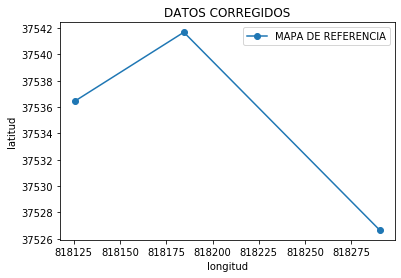

In [17]:
XF=109873.2144
YF=190903.3894
plt.figure()
plt.plot(REFX,REFY, 'o-', label='MAPA DE REFERENCIA')
#plt.plot(XF,YF, 'o', label='DATOS CORRECTOS')
plt.ylabel('latitud')  # nombra el eje x
plt.xlabel('longitud')  # nombra el eje y
plt.title('DATOS CORREGIDOS')
plt.legend()
plt.show()

In [18]:
print (X_3[4],Y_3[4],X_1[4],Y_1[4],m[4])

IndexError: list index out of range